In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import datetime

In [ ]:
# NSE2018 Data
input1 = pd.read_csv('C:\\Users\\erohcho\\OneDrive - Ericsson AB\\Project NSE\\Project_CODE\\NSE2018.csv')

# Identified missing Sectors Data
input2 = pd.read_csv('C:\\Users\\erohcho\\OneDrive - Ericsson AB\\Project NSE\\Project_CODE\\SECTOR.csv')

In [ ]:
input1.head(2)

,SYMBOL,sector,OPEN,HIGH,LOW,CLOSE,TOTTRDQTY,TOTTRDVAL,TIMESTAMP,TOTALTRADES
0,20MICRONS,Mining,58.95,60.70,57.90,58.75,156506,9316661.05,1/1/2018 0:00,1527
1,20MICRONS,Mining,58.75,60.55,57.65,58.05,173946,10190754.15,1/2/2018 0:00,994


In [ ]:
input2.head(2)

,SYMBOL,SECTOR
0,SCAPDVR,Misc
1,SCHAEFFLER,Bearings


In [ ]:
# dropping Sector column from Unprocessed Table
input1.drop(["sector"], axis = 1, inplace = True)

In [ ]:
input1.head()

,SYMBOL,OPEN,HIGH,LOW,CLOSE,TOTTRDQTY,TOTTRDVAL,TIMESTAMP,TOTALTRADES
0,20MICRONS,58.95,60.70,57.90,58.75,156506,9316661.05,1/1/2018 0:00,1527
1,20MICRONS,58.75,60.55,57.65,58.05,173946,10190754.15,1/2/2018 0:00,994
2,20MICRONS,58.70,60.50,58.50,59.20,191320,11345473.80,1/3/2018 0:00,1004
3,20MICRONS,59.45,63.20,58.60,62.60,812025,50057113.35,1/4/2018 0:00,5189
4,20MICRONS,64.80,67.00,63.00,63.60,1129498,73646779.85,1/5/2018 0:00,7645


In [ ]:
# Merging both dataframes (Vlookup equivalent in Excel)
data_merge = pd.merge(input1,  
                      input2,  
                      on ='SYMBOL',  
                      how ='inner') 
data_merge.head(2)

,SYMBOL,OPEN,HIGH,LOW,CLOSE,TOTTRDQTY,TOTTRDVAL,TIMESTAMP,TOTALTRADES,SECTOR
0,20MICRONS,58.95,60.70,57.90,58.75,156506,9316661.05,1/1/2018 0:00,1527,Mining
1,20MICRONS,58.75,60.55,57.65,58.05,173946,10190754.15,1/2/2018 0:00,994,Mining


In [ ]:
# saving the dataframe to output csv file
data_merge.to_csv('MasterFile_Updated.csv', index = False) 

# Importing corrected Dataset

In [ ]:
df=pd.read_csv("C:\\Users\\erohcho\\OneDrive - Ericsson AB\\Project NSE\\NSE PROTOTYPE\\MasterFile_Updated.csv")

In [ ]:
#df_indicators=pd.read_csv("C:\\Users\\erohcho\\OneDrive - Ericsson AB\\Project NSE\\NSE PROTOTYPE\\MasterFile_Updated.csv")

In [ ]:
df.head(2)

,SYMBOL,OPEN,HIGH,LOW,CLOSE,TOTTRDQTY,TOTTRDVAL,TIMESTAMP,TOTALTRADES,SECTOR
0,20MICRONS,58.95,60.70,57.90,58.75,156506,9316661.05,1/1/2018 0:00,1527,Mining
1,20MICRONS,58.75,60.55,57.65,58.05,173946,10190754.15,1/2/2018 0:00,994,Mining


In [ ]:
df['TIMESTAMP'] = df['TIMESTAMP'].apply(pd.to_datetime)
df.set_index('TIMESTAMP',inplace=True)
df.head(2)

,SYMBOL,OPEN,HIGH,LOW,CLOSE,TOTTRDQTY,TOTTRDVAL,TOTALTRADES,SECTOR
TIMESTAMP,,,,,,,,,
2018-01-01,20MICRONS,58.95,60.70,57.90,58.75,156506,9316661.05,1527,Mining
2018-01-02,20MICRONS,58.75,60.55,57.65,58.05,173946,10190754.15,994,Mining


In [ ]:
df_copy=df
df_copy.head(2)

,SYMBOL,OPEN,HIGH,LOW,CLOSE,TOTTRDQTY,TOTTRDVAL,TOTALTRADES,SECTOR
TIMESTAMP,,,,,,,,,
2018-01-01,20MICRONS,58.95,60.70,57.90,58.75,156506,9316661.05,1527,Mining
2018-01-02,20MICRONS,58.75,60.55,57.65,58.05,173946,10190754.15,994,Mining


In [ ]:
df_indicators=df_copy
df_indicators.head(2)

,SYMBOL,OPEN,HIGH,LOW,CLOSE,TOTTRDQTY,TOTTRDVAL,TOTALTRADES,SECTOR
TIMESTAMP,,,,,,,,,
2018-01-01,20MICRONS,58.95,60.70,57.90,58.75,156506,9316661.05,1527,Mining
2018-01-02,20MICRONS,58.75,60.55,57.65,58.05,173946,10190754.15,994,Mining


# Grouping by SYMBOL [SMA_20 & Bollinger Band]

In [ ]:
#df_indicators['SMA_20'] = df_indicators.groupby('SYMBOL')['CLOSE'].transform(lambda x: x.rolling(20,1).mean())
#df_indicators['Std_Dev'] = df_indicators.groupby('SYMBOL')['CLOSE'].transform(lambda x: x.rolling(20,1).std())
#df_indicators.head(2)

In [ ]:
#df_indicators.reset_index()

In [ ]:
#df_indicators['EMA_20']=df_indicators['CLOSE']*0.1538+df_indicators['CLOSE']*0.8462
#(df_indicators.loc[df_indicators['TIMESTAMP']==df_indicators['TIMESTAMP'].dt.dayofyear-1])

In [ ]:
#df_indicators['BB_High']=df_indicators['SMA_20']+2*df_indicators['Std_Dev'].replace(np.nan, 0)
#df_indicators['BB_Low']=df_indicators['SMA_20']-2*df_indicators['Std_Dev'].replace(np.nan, 0)
#df_indicators.head(22)

In [ ]:
#df_indicators['DOY']=df_indicators['TIMESTAMP'].dt.dayofyear
#df_indicators['EMA_20']=df_indicators['CLOSE']*0.1538+(df_indicators.loc[df_indicators['CLOSE']*0.8462 ==df_indicators['TIMESTAMP'].dt.dayofyear-1)

In [ ]:
# saving the dataframe to output csv file
#df_indicators.to_csv('SMA_20_BB_GROUP.csv', index = True) 

# Select SECTOR & create dataframe with Technical Indicators

In [ ]:
print ("Enter SECTOR of interest: ")
sector=input()
if sector not in df.values:

    print("No such SECTOR")
else:
    f1=(df['SECTOR']==sector)
    df2=df[f1]
df2.head(2)

Enter SECTOR of interest: 
Finance


,SYMBOL,OPEN,HIGH,LOW,CLOSE,TOTTRDQTY,TOTTRDVAL,TOTALTRADES,SECTOR
TIMESTAMP,,,,,,,,,
2018-04-10,21STCENMGM,35.2,35.8,35.2,35.8,106,3793.00,5,Finance
2018-04-11,21STCENMGM,36.5,36.5,35.5,35.5,2714,98709.95,15,Finance


In [ ]:
stocks_in_sector=df2['SYMBOL'].unique()
stocks_in_sector

array(['21STCENMGM', 'AAVAS', 'ABCAPITAL', 'ALANKIT', 'ALMONDZ',
       'ARIHANT', 'ARMANFIN', 'AXISNIFTY', 'BAJAJFINSV', 'BAJAJHLDNG',
       'BAJFINANCE', 'BFINVEST', 'BHARATFIN', 'BIRLAMONEY', 'BLBLIMITED',
       'CANFINHOME', 'CAPF', 'CAPTRUST', 'CDSL', 'CENTRUM', 'CGCL',
       'CHOLAFIN', 'CONSOFINVT', 'CORALFINAC', 'CREST', 'DBSTOCKBRO',
       'DCMFINSERV', 'DHFL', 'DHUNINV', 'EBANK', 'EDELWEISS', 'EMKAY',
       'EQ30', 'EQUITAS', 'FORTUNEFIN', 'GANGESSECU', 'GEOJITFSL',
       'GICHSGFIN', 'GOLDIWIN', 'GRUH', 'HBSL', 'HBSTOCK', 'HDFC',
       'HDFCAMC', 'HDFCMFGETF', 'HDFCNIFETF', 'HDFCSENETF', 'HNGSNGBEES',
       'IBULHSGFIN', 'IBVENTURES', 'ICICIGOLD', 'ICICILIQ', 'ICICIMCAP',
       'ICICINF100', 'ICICINV20', 'ICICIPRULI', 'ICICISENSX', 'IDBIGOLD',
       'IDFC', 'IDFNIFTYET', 'IFCI', 'IIFL', 'IITL', 'INDBANK',
       'INDOSTAR', 'INDOTHAI', 'INFRABEES', 'INVENTURE', 'IVC',
       'IVZINGOLD', 'IVZINNIFTY', 'JMFINANCIL', 'JPOLYINVST', 'JSWHL',
       'KEYCORPSER', 'KHAND

In [ ]:
df_sector=df2
df_sector.head(2)

,SYMBOL,OPEN,HIGH,LOW,CLOSE,TOTTRDQTY,TOTTRDVAL,TOTALTRADES,SECTOR
TIMESTAMP,,,,,,,,,
2018-04-10,21STCENMGM,35.2,35.8,35.2,35.8,106,3793.00,5,Finance
2018-04-11,21STCENMGM,36.5,36.5,35.5,35.5,2714,98709.95,15,Finance


In [ ]:
#df_sector['SMA_10'] = df_sector.iloc[:,4].rolling(window=10).mean().replace(np.nan, 0)
#df_sector['SMA_20'] = df_sector.iloc[:,4].rolling(window=20).mean().replace(np.nan, 0)
#df_sector['SMA_50'] = df_sector.iloc[:,4].rolling(window=50).mean().replace(np.nan, 0)
#df_sector['SMA_100'] = df_sector.iloc[:,4].rolling(window=100).mean().replace(np.nan, 0)
#df_sector['SMA_200'] = df_sector.iloc[:,4].rolling(window=200).mean().replace(np.nan, 0)
#Window = 20
#std = 2
#rolling_mean = df_sector['CLOSE'].rolling(Window).mean()
#rolling_std = df_sector['CLOSE'].rolling(Window).std()
#df_sector['Rolling Mean'] = rolling_mean.replace(np.nan, 0)
#df_sector['Bollinger High']= (rolling_mean+ (rolling_std*std)).replace(np.nan, 0)
#df_sector['Bollinger Low']= (rolling_mean-(rolling_std*std)).replace(np.nan, 0)
#df_sector.drop(['Std_Dev','BB_High','BB_Low'],axis=1)
#df_sector.head()

In [ ]:
#df_sector1=df_sector.drop(['Std_Dev','BB_High','BB_Low','SMA_20'],axis=1)
#df_sector1.head(2)

In [ ]:
#=df_sector1

In [ ]:
#df_sector1.head()

# # Select STOCK & create dataframe with Technical Indicators

In [ ]:
print ("Enter Stock SYMBOL: ")
stock=input()
if stock not in df2.values:
    print("No such STOCK")
else:
    f2=(df2['SYMBOL']==stock)
    df3=df2[f2]
df3.head(2)

Enter Stock SYMBOL: 
IFCI


,SYMBOL,OPEN,HIGH,LOW,CLOSE,TOTTRDQTY,TOTTRDVAL,TOTALTRADES,SECTOR,SMA_10,SMA_20,SMA_50,SMA_100,SMA_200,Rolling Mean,Bollinger High,Bollinger Low
TIMESTAMP,,,,,,,,,,,,,,,,,
2018-01-01,IFCI,30.65,31.7,29.9,30.25,22756110,700933732.6,24723,Finance,101.409,104.4970,105.9492,110.5439,107.82525,104.4970,139.675381,69.318619
2018-01-02,IFCI,30.35,30.8,28.2,28.70,21462594,627516435.8,23769,Finance,93.654,100.6845,104.2860,109.7339,107.75150,100.6845,149.529022,51.839978


In [ ]:
df3['SMA_10'] = df3.iloc[:,4].rolling(window=10).mean().replace(np.nan, 0)
df3['SMA_20'] = df3.iloc[:,4].rolling(window=20).mean().replace(np.nan, 0)
df3['SMA_50'] = df3.iloc[:,4].rolling(window=50).mean().replace(np.nan, 0)
df3['SMA_100'] = df3.iloc[:,4].rolling(window=100).mean().replace(np.nan, 0)
df3['SMA_200'] = df3.iloc[:,4].rolling(window=200).mean().replace(np.nan, 0)

In [ ]:
Window = 20
std = 2
rolling_mean = df3['CLOSE'].rolling(Window).mean()
rolling_std = df3['CLOSE'].rolling(Window).std()
df3['Rolling Mean'] = rolling_mean.replace(np.nan, 0)
df3['Bollinger High']= (rolling_mean+ (rolling_std*std)).replace(np.nan, 0)
df3['Bollinger Low']= (rolling_mean-(rolling_std*std)).replace(np.nan, 0)
df3.head(22)

,SYMBOL,OPEN,HIGH,LOW,CLOSE,TOTTRDQTY,TOTTRDVAL,TOTALTRADES,SECTOR,SMA_10,SMA_20,SMA_50,SMA_100,SMA_200,Rolling Mean,Bollinger High,Bollinger Low
TIMESTAMP,,,,,,,,,,,,,,,,,
2018-01-01,IFCI,30.65,31.70,29.90,30.25,22756110,7.009337e+08,24723,Finance,0.000,0.0000,0.0,0.0,0.0,0.0000,0.000000,0.000000
2018-01-02,IFCI,30.35,30.80,28.20,28.70,21462594,6.275164e+08,23769,Finance,0.000,0.0000,0.0,0.0,0.0,0.0000,0.000000,0.000000
2018-01-03,IFCI,28.70,29.45,28.35,29.25,20007093,5.827399e+08,19230,Finance,0.000,0.0000,0.0,0.0,0.0,0.0000,0.000000,0.000000
2018-01-04,IFCI,29.35,29.65,28.90,29.20,12253767,3.577037e+08,12009,Finance,0.000,0.0000,0.0,0.0,0.0,0.0000,0.000000,0.000000
2018-01-05,IFCI,29.25,31.80,29.00,30.60,37744897,1.160722e+09,36487,Finance,0.000,0.0000,0.0,0.0,0.0,0.0000,0.000000,0.000000
2018-01-08,IFCI,31.10,32.00,30.35,31.10,22585293,7.096673e+08,22233,Finance,0.000,0.0000,0.0,0.0,0.0,0.0000,0.000000,0.000000
2018-01-09,IFCI,31.00,32.25,29.90,30.25,35328916,1.098312e+09,32792,Finance,0.000,0.0000,0.0,0.0,0.0,0.0000,0.000000,0.000000
2018-01-10,IFCI,30.25,30.95,29.80,30.45,15386934,4.683506e+08,15007,Finance,0.000,0.0000,0.0,0.0,0.0,0.0000,0.000000,0.000000
2018-01-11,IFCI,30.80,32.60,30.55,32.25,46849100,1.493408e+09,44074,Finance,0.000,0.0000,0.0,0.0,0.0,0.0000,0.000000,0.000000


# STOCK PRICE TREND

In [ ]:
#df3['TIMESTAMP'] = df3['TIMESTAMP'].apply(pd.to_datetime)
#df3.set_index('TIMESTAMP',inplace=True)
#df3.head()

Text(0, 0.5, 'Closing Price')

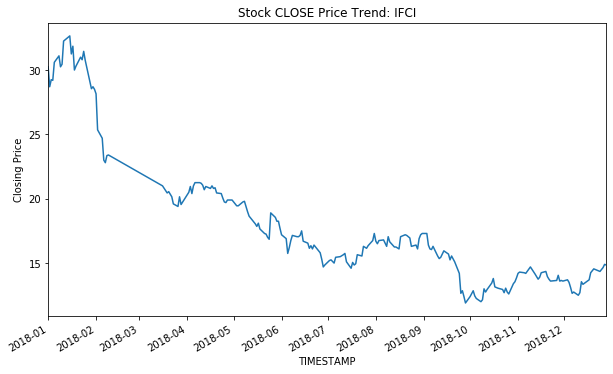

In [ ]:
df3['CLOSE'].plot(figsize=(10,6),title='Stock CLOSE Price Trend: '+stock)
plt.ylabel('Closing Price')

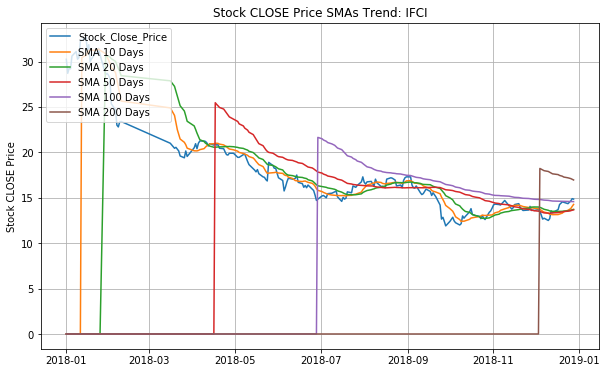

In [ ]:
plt.figure(figsize=[10,6])
plt.ylabel('Stock CLOSE Price')
plt.title('Stock CLOSE Price SMAs Trend: '+stock)
plt.grid(True)
plt.plot(df3['CLOSE'],label='Stock_Close_Price')
plt.plot(df3['SMA_10'],label='SMA 10 Days')
plt.plot(df3['SMA_20'],label='SMA 20 Days')
plt.plot(df3['SMA_50'],label='SMA 50 Days')
plt.plot(df3['SMA_100'],label='SMA 100 Days')
plt.plot(df3['SMA_200'],label='SMA 200 Days')
plt.legend(loc=2)

# STOCK wise BOLLINGER BAND

In [1]:
plt.figure(figsize=[10,6])
plt.grid(True)
plt.title('Bollinger Band: '+stock)
plt.plot(df3['CLOSE'],label='Close Price')
plt.plot(df3['Bollinger High'],label='Bollinger High')
plt.plot(df3['Bollinger Low'],label='Bollinger Low')
plt.legend(loc=2)
plt.plot()
#df3[['CLOSE', 'Bollinger High', 'Bollinger Low']].plot()

NameError: ignored

# Filtering Latest Data & creating SEGMENTATION with mean

In [ ]:
df_dec=df2.loc['2018-12-01':'2018-12-31']

In [ ]:
df_dec.head()

,SYMBOL,OPEN,HIGH,LOW,CLOSE,TOTTRDQTY,TOTTRDVAL,TOTALTRADES,SECTOR,SMA_10,SMA_50,SMA_100,SMA_200,Rolling Mean,Bollinger High,Bollinger Low
TIMESTAMP,,,,,,,,,,,,,,,,
2018-12-03,ASHOKLEY,112.45,112.45,106.00,107.15,38877711,4.181223e+09,149588,Auto,109.325,114.952,119.9465,0.00000,111.9800,122.401153,101.558847
2018-12-04,ASHOKLEY,107.20,108.25,106.40,107.30,19205961,2.060209e+09,82712,Auto,109.175,114.549,119.7615,130.50600,111.6775,122.280850,101.074150
2018-12-05,ASHOKLEY,106.65,106.90,102.65,103.60,35663386,3.711740e+09,153473,Auto,108.770,114.093,119.5245,130.43075,110.9725,121.763162,100.181838
2018-12-06,ASHOKLEY,102.35,102.70,101.10,102.10,21429046,2.183733e+09,84707,Auto,107.950,113.619,119.2505,130.32450,110.0425,120.504274,99.580726
2018-12-07,ASHOKLEY,102.40,103.70,101.25,102.90,16073694,1.648829e+09,59808,Auto,107.310,113.231,119.0295,130.21650,109.1425,118.732093,99.552907


In [ ]:
df_dec_copy=df_dec

# Grouping Data by Symbol and creating labeled categories

In [ ]:
grp=df_copy.groupby(['SECTOR','SYMBOL'])

In [ ]:
df_grp=grp['CLOSE'].agg([np.mean])

In [ ]:
df_grp.head()

mean
SECTOR SYMBOL                
Agro   ASTEC       604.183256
       BAYERCROP  4376.475116
       BHARATRAS  5782.600465
       DHANUKA     548.603953
       EXCELCROP  3536.686744

In [ ]:
df_grp['Stock_Category'] = ['Penny Stock' if mean<50.000 else 'Low Price' if 50.000<=mean<300.000 else 'Mid Price' if 300.000<mean<800.000 else 'High Price' for mean in df_grp['mean']]

In [ ]:
df_grp

mean Stock_Category
SECTOR                     SYMBOL                                
Agro                       ASTEC        604.183256      Mid Price
                           BAYERCROP   4376.475116     High Price
                           BHARATRAS   5782.600465     High Price
                           DHANUKA      548.603953      Mid Price
                           EXCELCROP   3536.686744     High Price
...                                            ...            ...
Transportation             VRLLOG       345.664186      Mid Price
Transportation - Logistics TCIEXP       577.592093      Mid Price
Travel                     COX&KINGS    214.555825      Low Price
                           THOMASCOOK   252.116047      Low Price
polymer & Composite        TPLPLASTEH   320.137907      Mid Price

[1682 rows x 2 columns]

In [ ]:
# saving the output as Stock's Price Categorization based on Median of CLOSE price for December in a csv file 
df_grp. to_csv('Stock_Mean_Price_Category.csv')

In [ ]:
df_cat=df_grp.groupby(['Stock_Category']).count()
df_cat.head()

,mean
Stock_Category,
High Price,244
Low Price,617
Mid Price,327
Penny Stock,494


In [ ]:
# Importing SEGMENTED Shares
df_cat1 = pd.read_csv('Stock_Mean_Price_Category.csv')

In [ ]:
df_cat=df_cat.reset_index()
df_cat.head()

,Stock_Category,mean
0,High Price,244
1,Low Price,617
2,Mid Price,327
3,Penny Stock,494


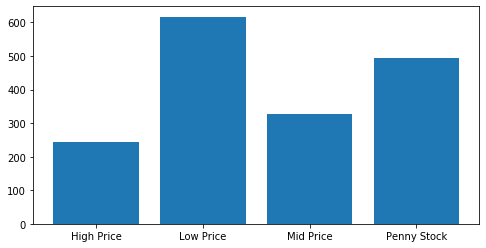

In [ ]:
fig2=plt.figure(figsize=(8,4))
plot2=plt.bar(df_cat['Stock_Category'],df_cat['mean'])

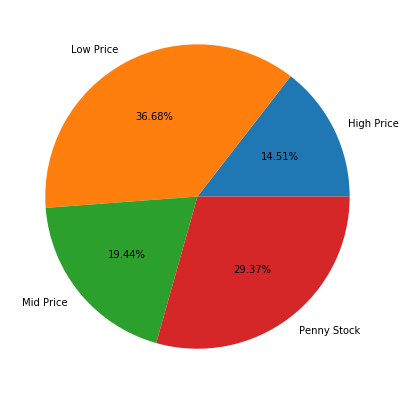

In [ ]:
fig1=plt.figure(figsize=(10,7))
plot=plt.pie(df_cat['mean'],labels=df_cat['Stock_Category'],autopct='%1.2f%%')

# SECTOR wise grouping & K-means [Sector was chosen earlier]

In [ ]:
grp=df2.groupby(['SECTOR','SYMBOL'])

In [ ]:
df_grp1=grp['CLOSE','Rolling Mean','HIGH','LOW','Bollinger High','Bollinger Low'].agg([np.mean])

In [ ]:
df_grp1.head()

CLOSE Rolling Mean        HIGH         LOW  \
                          mean         mean        mean        mean   
SECTOR  SYMBOL                                                        
Finance 21STCENMGM   32.780473    29.220163   33.165385   32.528698   
        AAVAS       736.234906   595.695896  751.313208  716.969811   
        ABCAPITAL   136.720233   168.079058  139.104884  135.244651   
        ALANKIT      33.400930    36.760802   34.491860   32.507907   
        ALMONDZ      25.540625    25.548281   26.282813   24.608854   

                   Bollinger High Bollinger Low  
                             mean          mean  
SECTOR  SYMBOL                                   
Finance 21STCENMGM      31.995939     26.444386  
        AAVAS          867.929074    323.462719  
        ABCAPITAL      225.208401    110.949715  
        ALANKIT         43.175517     30.346088  
        ALMONDZ         30.184497     20.912065

In [ ]:
data_rel=df_grp1[['CLOSE','Rolling Mean','Bollinger High','Bollinger Low']]

In [ ]:
data_rel.head(2)

CLOSE Rolling Mean Bollinger High Bollinger Low
                          mean         mean           mean          mean
SECTOR  SYMBOL                                                          
Finance 21STCENMGM   32.780473    29.220163      31.995939     26.444386
        AAVAS       736.234906   595.695896     867.929074    323.462719

In [ ]:
data_rel.isnull().sum()

CLOSE           mean    0
Rolling Mean    mean    0
Bollinger High  mean    0
Bollinger Low   mean    0
dtype: int64

In [ ]:
data_rel.shape

(163, 4)

In [ ]:
from sklearn import preprocessing
scaler=preprocessing.StandardScaler()
data_scaled=scaler.fit_transform(data_rel)

In [ ]:
data_scaled

array([[-4.66179736e-01, -5.01337899e-01, -5.01938328e-01,
        -4.52979393e-01],
       [ 9.49417453e-02, -2.92340979e-02,  6.46510232e-02,
        -1.62112178e-01],
       [-3.83270554e-01, -3.85612178e-01, -3.70980338e-01,
        -3.70224132e-01],
       [-4.65684819e-01, -4.95053491e-01, -4.94360893e-01,
        -4.49158494e-01],
       [-4.71954715e-01, -5.04398063e-01, -5.03166111e-01,
        -4.58397142e-01],
       [-4.65578393e-01, -4.98274157e-01, -4.97612033e-01,
        -4.52030042e-01],
       [-2.00581659e-01, -2.42001503e-01, -2.42796542e-01,
        -2.17928372e-01],
       [ 3.76937748e-01,  3.55478538e-01,  2.50286846e-01,
         4.73787964e-01],
       [ 4.16349116e+00,  4.15093384e+00,  3.71229844e+00,
         4.39147259e+00],
       [ 1.78359615e+00,  1.97187448e+00,  1.77959403e+00,
         2.06289296e+00],
       [ 1.28699229e+00,  1.34839436e+00,  1.17730725e+00,
         1.46785358e+00],
       [-2.65399491e-01, -2.03985895e-01, -1.26751706e-01,
      

# Checking required no. of clusters

In [2]:
import sklearn.cluster as cluster

In [3]:
compactness=[]
cls=[2,3,4,5,6,7,8,9,10,11,12]

In [4]:
for i in cls:
    mod=cluster.KMeans(n_clusters=i)
    mod=mod.fit(data_scaled)
    compactness.append(mod.inertia_)

NameError: ignored

In [ ]:
plt.plot(cls,compactness,"*")

In [ ]:
mod=cluster.KMeans(n_clusters=4)

In [ ]:
mod=mod.fit(data_scaled)
mod

In [ ]:
mod.inertia_

In [ ]:
#Labeling the data
data_rel['labels_4']=mod.labels_

In [ ]:
mod.labels_

In [ ]:
data_rel['labels_4'].value_counts()